In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot: >

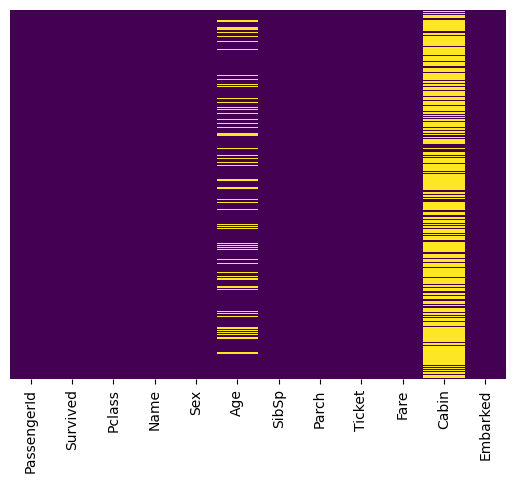

In [8]:
sns.heatmap(train.isnull(), cbar=False
            , yticklabels=False
            , cmap='viridis')

In [9]:
sns.set_style('whitegrid')

<AxesSubplot: xlabel='Survived', ylabel='count'>

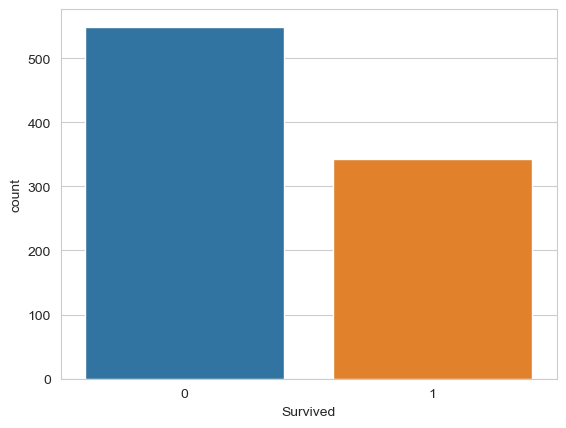

In [11]:
sns.countplot(x='Survived', data=train)

<AxesSubplot: xlabel='Survived', ylabel='count'>

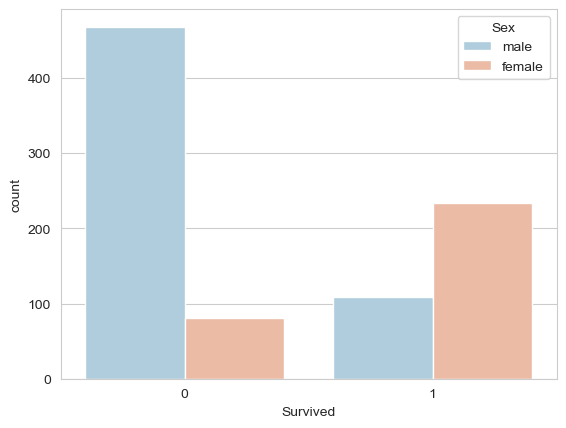

In [16]:
sns.countplot(x='Survived', data=train, hue='Sex', palette='RdBu_r')

<AxesSubplot: xlabel='Survived', ylabel='count'>

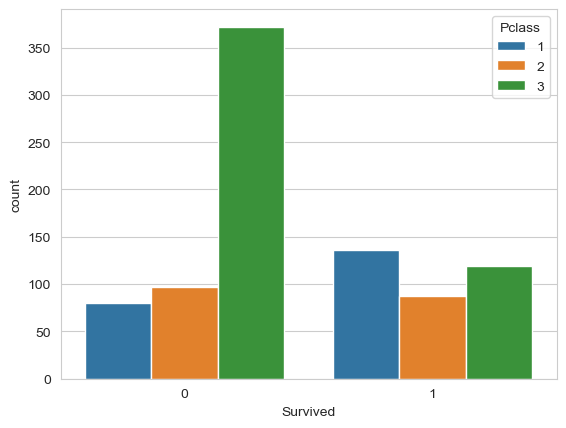

In [17]:
sns.countplot(x='Survived', data=train, hue='Pclass')

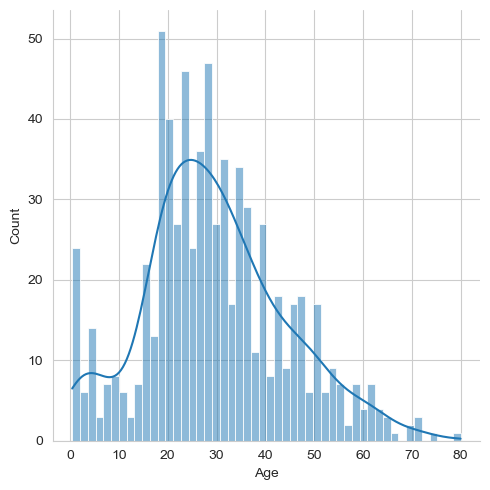

In [13]:
sns.displot(train['Age'].dropna(), kde=True, bins=50)

<AxesSubplot: ylabel='Frequency'>

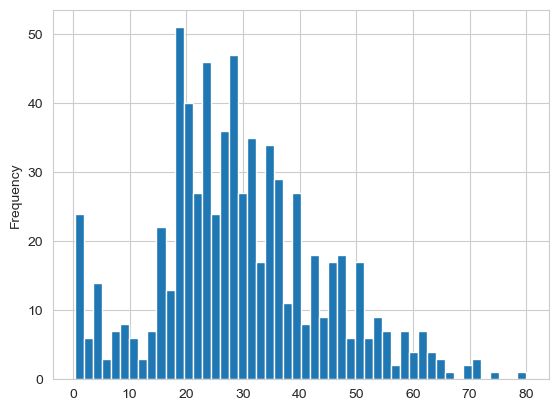

In [18]:
train['Age'].plot.hist(bins=50)

<AxesSubplot: xlabel='SibSp', ylabel='count'>

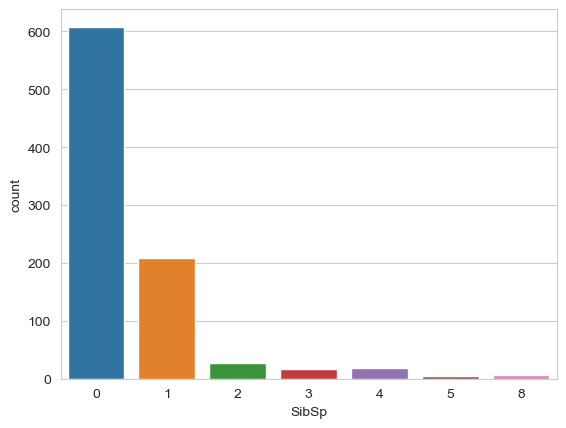

In [19]:
sns.countplot(x='SibSp', data=train)

<AxesSubplot: >

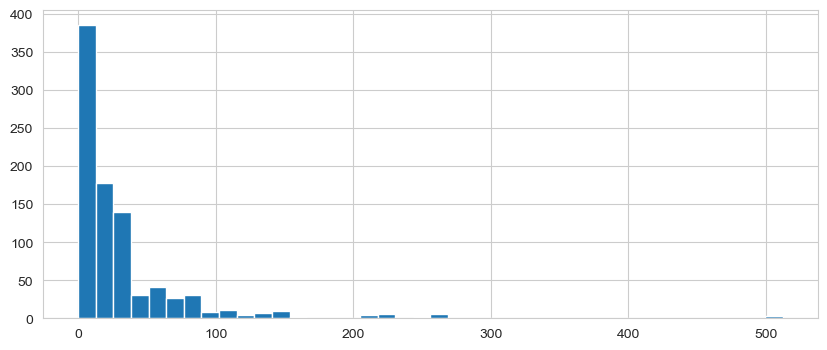

In [19]:
train['Fare'].hist(bins=40, figsize=(10,4))

In [20]:
import chart_studio.plotly as py

In [21]:
import cufflinks as cf

In [22]:
cf.go_offline()

In [23]:
train['Fare'].iplot(kind='hist',bins=40)

In [24]:
import plotly.express as px

fig = px.histogram(train, x='Fare', nbins=40)
fig.show()

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

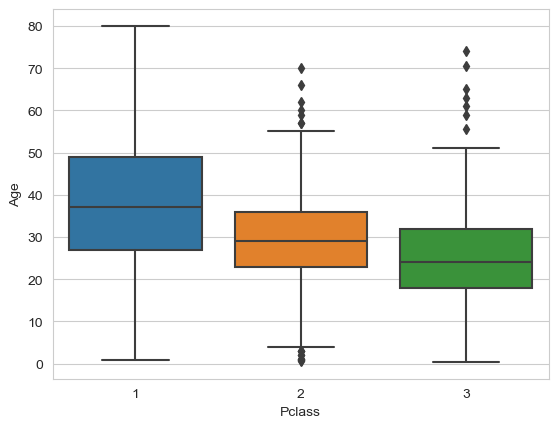

In [28]:
sns.boxplot(x = 'Pclass', y = 'Age', data = train)

## **Cleaning the Data**

So, now we want to replace the null values in Age column with some reasonable values.
To do so,  we can creat a function that returns average of ages for each Pcalss like this:

In [31]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [32]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot: >

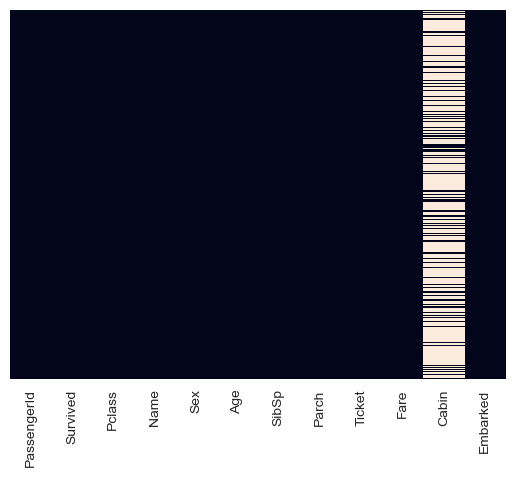

In [34]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

So, we filled the Age gaps with reasonable guesses. But what about Cabin column? There is a huge data missing there.
So we just drom this column.

In [35]:
train.drop('Cabin', axis=1, inplace=True)

In [37]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot: >

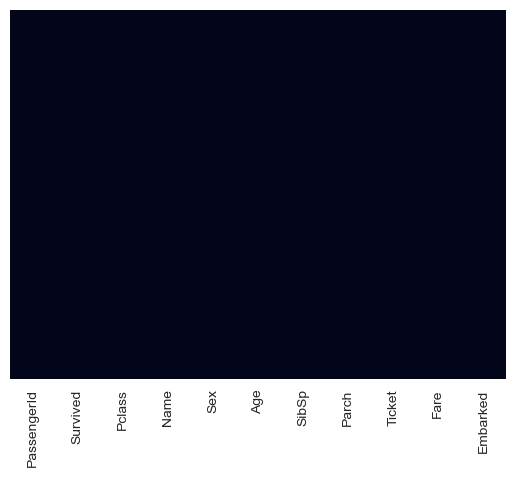

In [38]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [39]:
#to drop any more missing values:
train.dropna(inplace=True)

A ML algorithm cannot use the categorical variable e.g. Sex: Male/Female. Therefore, we need to convert them to numeric values e.g. 0 1. This numerical replacement is calld a dummy variable.

In [45]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [46]:
train = pd.concat([train, sex, embark], axis = 1)

In [48]:
train.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace=True)

In [52]:
train.drop(['PassengerId'], axis=1, inplace=True)

In [54]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [57]:
from sklearn.model_selection import train_test_split

In [1]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

NameError: name 'train_test_split' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression

In [60]:
logmodel = LogisticRegression()

In [61]:
logmodel.fit(X_train,y_train)

/Users/armna254/miniconda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [62]:
predictions = logmodel.predict(X_test)

In [63]:
from sklearn.metrics import classification_report

In [64]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [65]:
from sklearn.metrics import confusion_matrix

In [66]:
confusion_matrix(y_test,predictions)

array([[147,  16],
       [ 30,  74]])